## Cargamos las librerias

In [ ]:
!pip install gmplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 4.1 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmplot
from IPython.display import display

## Cargamos el archivo


In [ ]:
#cargamos el archivo
from google.colab import files
uploaded = files.upload()

Saving datos_abiertos_2023_mayo.csv to datos_abiertos_2023_mayo.csv


In [ ]:
# Cargar el archivo CSV en un dataframe
dataframe = pd.read_csv("datos_abiertos_2023_mayo.csv")
# Verificar la carga exitosa imprimiendo las primeras filas del dataframe
dataframe.head()

,Viaje_Id,Usuario_Id,Genero,Ano_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id
0,28467098,70123,M,1967.0,01/05/2023 00:00,01/05/2023 00:22,64,141
1,28467099,2237235,M,1980.0,01/05/2023 00:00,01/05/2023 00:04,36,172
2,28467100,2051727,F,2002.0,01/05/2023 00:01,01/05/2023 00:10,96,296
3,28467101,2246225,M,1969.0,01/05/2023 00:01,01/05/2023 00:04,33,255
4,28467102,324247,M,1975.0,01/05/2023 00:01,01/05/2023 00:13,226,231


## Hacemos unos cambios en el formato del dataframe y añadimos una columna con la edad

In [ ]:
dataframe['Inicio_del_viaje'] = pd.to_datetime(dataframe['Inicio_del_viaje'])
dataframe['Fin_del_viaje'] = pd.to_datetime(dataframe['Fin_del_viaje'])

# Calcular la duración del viaje en minutos y guardarla en la columna 'Duracion_del_viaje'
dataframe['Duracion_del_viaje'] = (dataframe['Fin_del_viaje'] - dataframe['Inicio_del_viaje']).dt.total_seconds() / 60

mapeo_genero = {'M': 0, 'F': 1} #HOMBRES (M) --> 0 Y MUJERES(F)-->1
# Aplicar el mapeo al dataframe
dataframe['Genero'] = dataframe['Genero'].map(mapeo_genero)
# Obtener el año actual
anio_actual = 2023
# Calcular la edad restando el año de nacimiento del año actual
dataframe['Edad'] = anio_actual - dataframe['Ano_de_nacimiento']

## Seleccionamos una muestra equitativa de mujeres y hombres

In [ ]:
df_hombres = dataframe[dataframe['Genero'] == 0]
df_mujeres = dataframe[dataframe['Genero'] == 1]
#tomamos una muestra de los hombres para tener datos de la misma cantidad de hombres y mujeres
df_mujeres = df_mujeres.sample(frac = 0.25, random_state = 14)
df_hombres = df_hombres.sample(frac = 0.0919, random_state = 14)
#concatenamos los datos
df = pd.concat([df_hombres, df_mujeres], ignore_index=True)

In [ ]:
#Obtenemos las distintas horas de salida de cada uno de los usuarios
df_Hora1 = df_mujeres['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)
# Convertir la hora en minutos
df_HoraSalidaM = df_Hora1.astype(int)

df_Hora1 = df_hombres['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)
# Convertir la hora en minutos
df_HoraSalidaH = df_Hora1.astype(int)

## Creamos un histograma de la frecuencia de usuarios en las distintas horas del dia

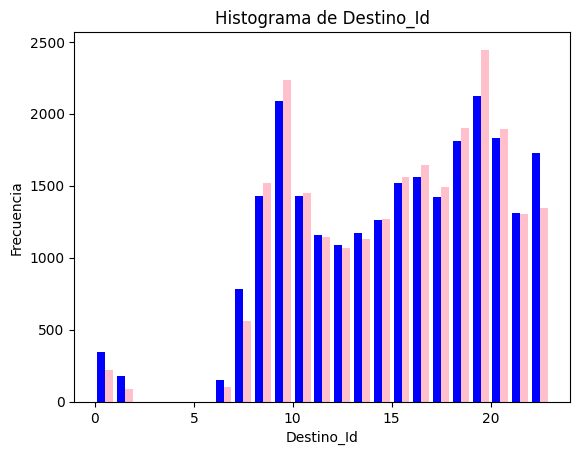

In [ ]:
num_bins = max(df_HoraSalidaH)
# Crear histograma para la variable "Destino_Id"
plt.hist([df_HoraSalidaH, df_HoraSalidaM], bins=num_bins, color=["blue", 'pink'])  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Destino_Id')
plt.ylabel('Frecuencia')
plt.title('Histograma de Destino_Id')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

## Realizamos un clustering de los usuarios, los grupos quedan definidos por el genero y la edad de estos. Hacemos 8 clusters.

In [ ]:
df = df.dropna()
X = df[['Edad', 'Genero']]

# Normalizar los datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Crear un objeto de clustering (por ejemplo, utilizando k-means con 3 clusters)
kmeans = KMeans(n_clusters=8)

# Ajustar el modelo de clustering a los datos normalizados
kmeans.fit(X_scaled)

# Obtener las etiquetas de los clusters asignados a cada punto de datos
labels = kmeans.labels_
centroides = kmeans.cluster_centers_

# Agregar las etiquetas de los clusters al dataframe
df['cluster'] = labels
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Viaje_Id,Usuario_Id,Genero,Ano_de_nacimiento,Inicio_del_viaje,Fin_del_viaje,Origen_Id,Destino_Id,Duracion_del_viaje,Edad,cluster
0,28717066,2304351,0.0,1998.0,2023-05-18 16:29:00,2023-05-18 16:36:00,322,267,7.0,25.0,4
1,28492806,501314,0.0,1998.0,2023-03-05 07:58:00,2023-03-05 08:07:00,235,317,9.0,25.0,4
2,28895991,2006125,0.0,1991.0,2023-05-31 21:43:00,2023-05-31 21:50:00,3,51,7.0,32.0,7
3,28479305,267063,0.0,1972.0,2023-02-05 10:43:00,2023-02-05 11:08:00,141,19,25.0,51.0,3
4,28525130,405743,0.0,1993.0,2023-04-05 22:42:00,2023-04-05 22:56:00,181,165,14.0,30.0,7


## Hacemos un dataframe con cada uno de los grupos resultantes

In [ ]:
df0 = df[df['cluster'] == 0]
df1 = df[df['cluster'] == 1]
df2 = df[df['cluster'] == 2]
df3 = df[df['cluster'] == 3]
df4 = df[df['cluster'] == 4]
df5 = df[df['cluster'] == 5]
df6 = df[df['cluster'] == 6]
df7 = df[df['cluster'] == 7]

42.562068243667575 0.0
24.820129984191112 1.0
42.09314359637775 1.0
57.1037037037037 0.0
24.626290851658364 0.0
31.94034827713968 1.0
54.947548460661345 1.0
32.516388448885095 0.0


In [ ]:
#Obtenemos las distintas horas de salida de cada uno de los usuarios
df_HoraSalida0 = (df0['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida1 = (df1['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida2 = (df2['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida3 = (df3['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida4 = (df4['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida5 = (df5['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida6 = (df6['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)
df_HoraSalida7 = (df7['Inicio_del_viaje'].dt.strftime('%H:%M:%S').str.slice(0, 2)).astype(int)

## Ploteamos los histogramas con la frecuencia de los distintos tipos de usuarios a las distintas horas del dia

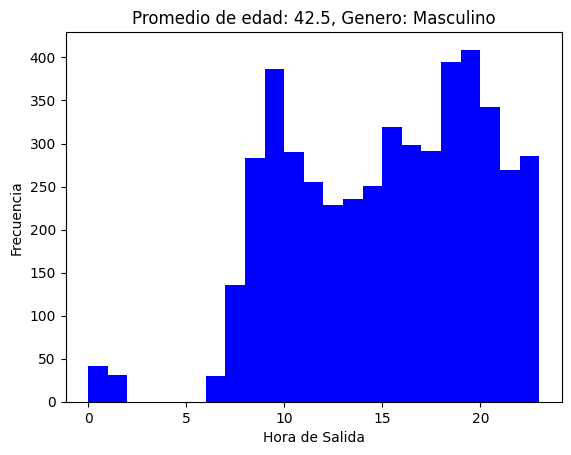

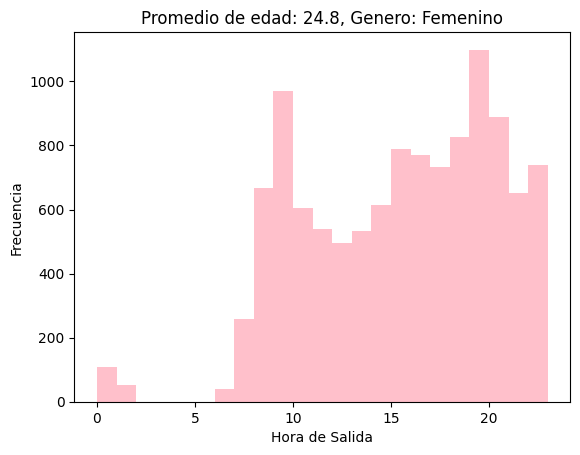

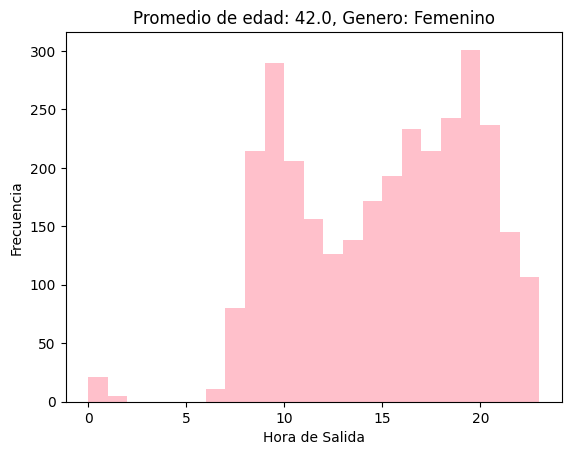

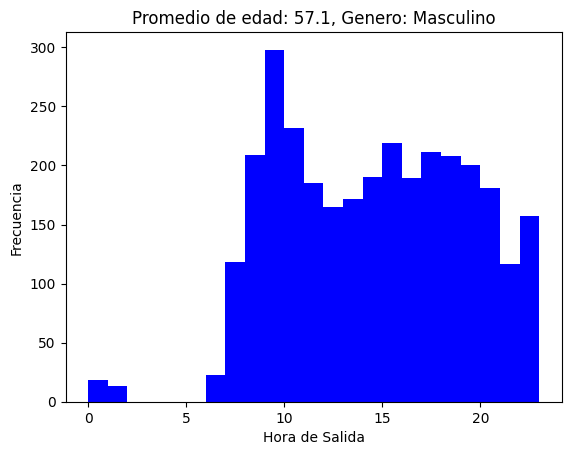

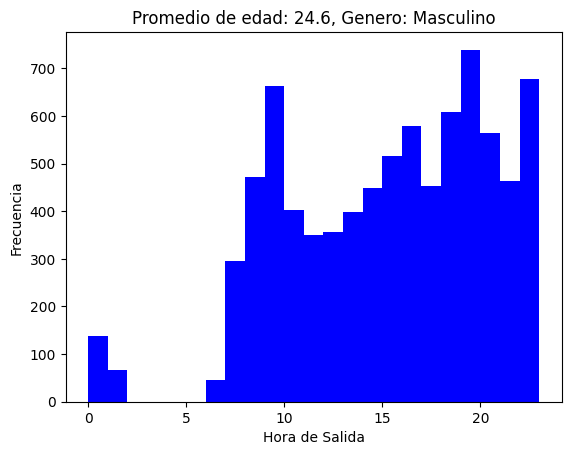

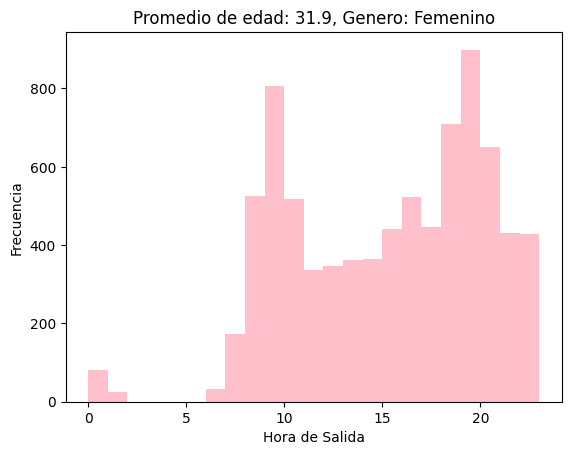

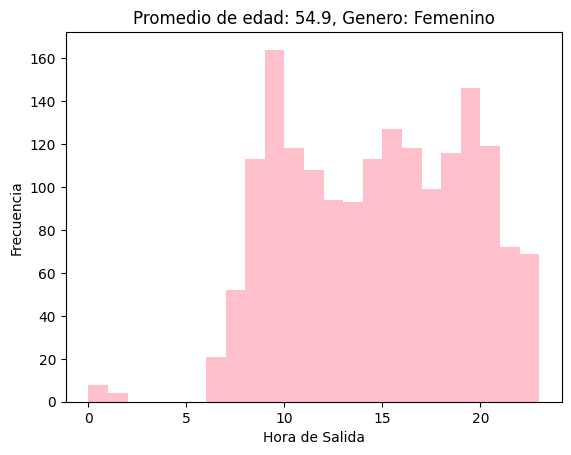

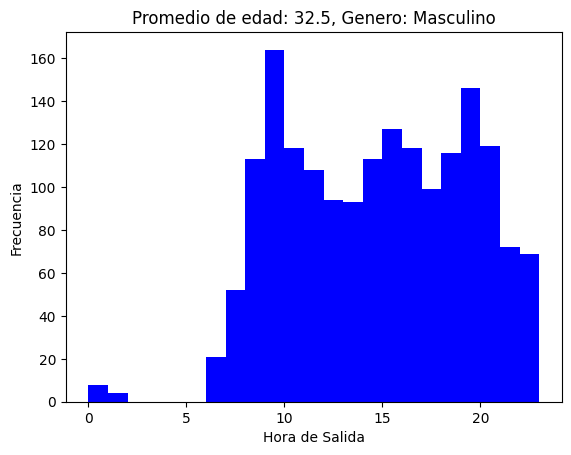

In [ ]:
num_bins = max(df_HoraSalida0)
# Crear histogramas para observar la frecuencia en la que se usan las estaciones en cada hora

plt.hist(df_HoraSalida0, bins=num_bins, color="blue")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 42.5, Genero: Masculino')
plt.show()

print("\n")
plt.hist(df_HoraSalida1, bins=num_bins, color="pink")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 24.8, Genero: Femenino')
plt.show()

print("\n")
plt.hist(df_HoraSalida2, bins=num_bins, color="pink")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 42.0, Genero: Femenino')
plt.show()

print("\n")
plt.hist(df_HoraSalida3, bins=num_bins, color="blue")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 57.1, Genero: Masculino')
plt.show()

print("\n")
plt.hist(df_HoraSalida4, bins=num_bins, color="blue")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 24.6, Genero: Masculino')
plt.show()

print("\n")
plt.hist(df_HoraSalida5, bins=num_bins, color="pink")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 31.9, Genero: Femenino')
plt.show()

print("\n")
plt.hist(df_HoraSalida6, bins=num_bins, color="pink")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 54.9, Genero: Femenino')
plt.show()

print("\n")
plt.hist(df_HoraSalida6, bins=num_bins, color="blue")  # Puedes ajustar el número de bins según tus preferencias
plt.xlabel('Hora de Salida')
plt.ylabel('Frecuencia')
plt.title('Promedio de edad: 32.5, Genero: Masculino')
plt.show()